# Acquire & Summarize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from acquire import get_connection, get_zillow_data

import warnings
warnings.filterwarnings("ignore")

## 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. 
- Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = get_zillow_data()

## 2. Summarize your data 
- (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.shape

(77380, 70)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77379
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77380 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77380 non-null  float64
 4   heatingorsystemtypeid         49439 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77380 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

In [6]:
df = df.drop(df.columns[[59]], axis = 1)

<div class="alert alert-block alert-info">
Takeaways:
    
- Dropping duplicated id columns
    
</div>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77380.0,1.300715e+07,3.481368e+06,1.071186e+07,1.153830e+07,1.253155e+07,1.421184e+07,1.676893e+08
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77380.0,2.618264e+02,5.141231e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49439.0,3.920447e+00,3.592789e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
id,77380.0,1.495126e+06,8.609057e+05,3.490000e+02,7.520500e+05,1.497870e+06,2.240480e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


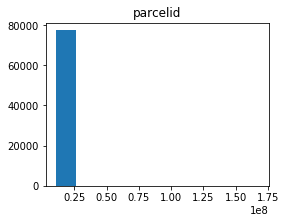

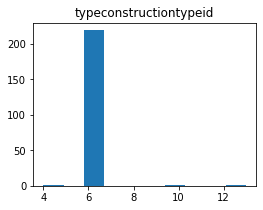

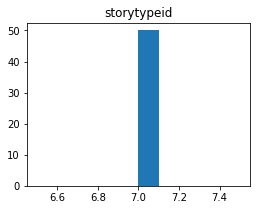

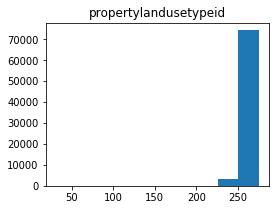

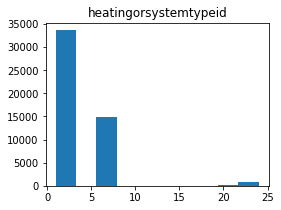

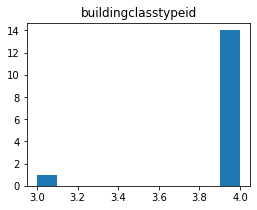

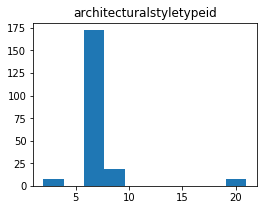

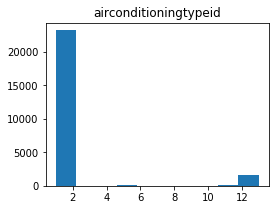

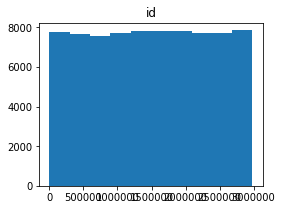

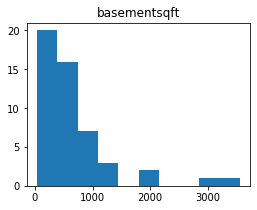

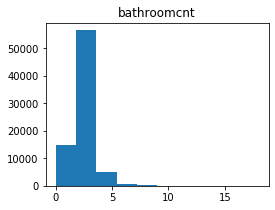

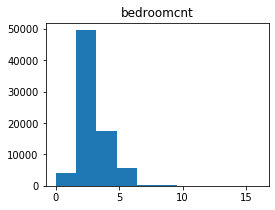

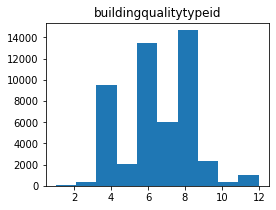

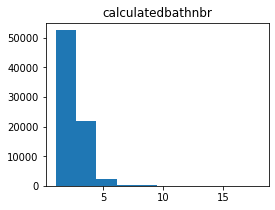

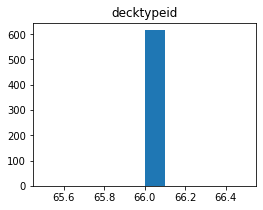

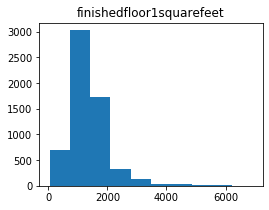

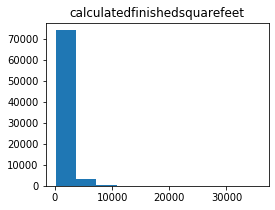

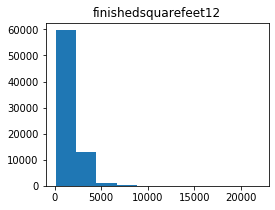

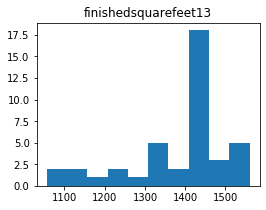

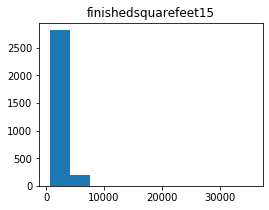

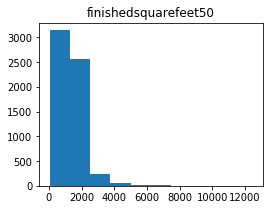

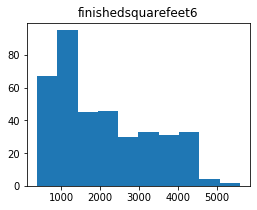

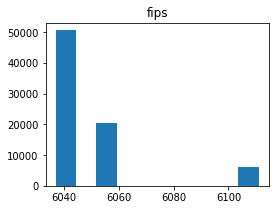

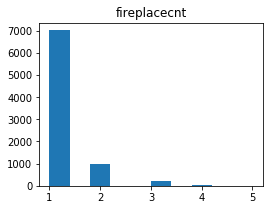

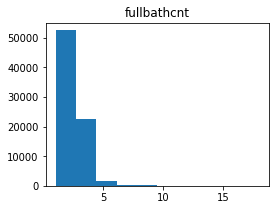

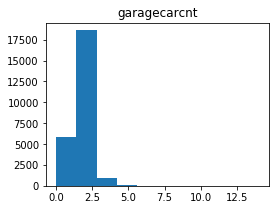

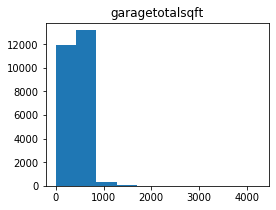

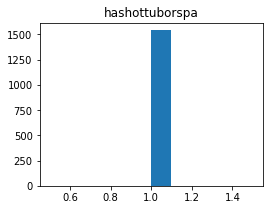

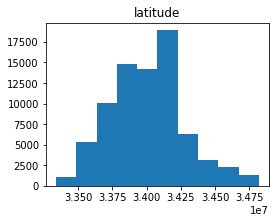

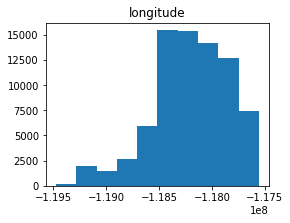

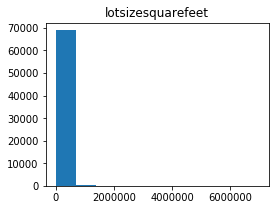

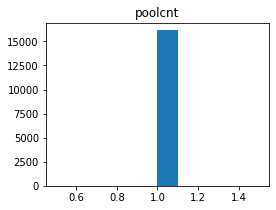

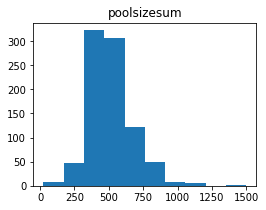

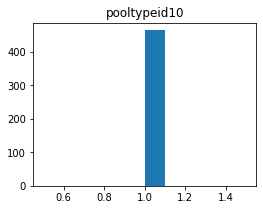

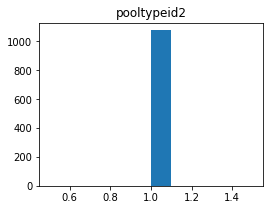

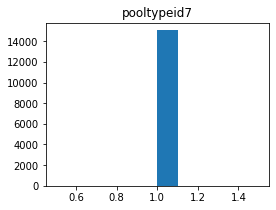

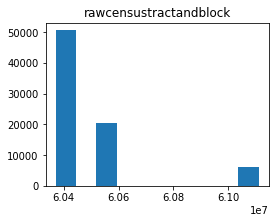

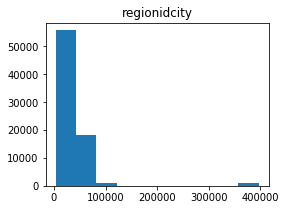

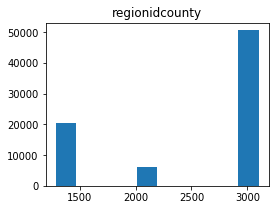

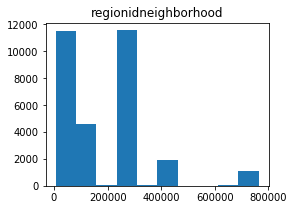

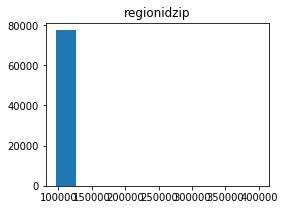

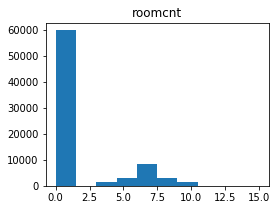

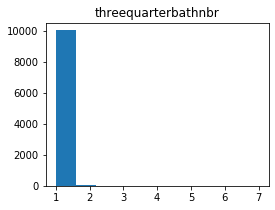

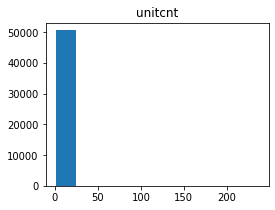

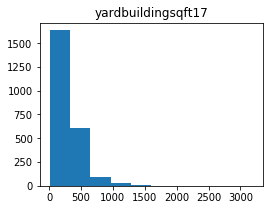

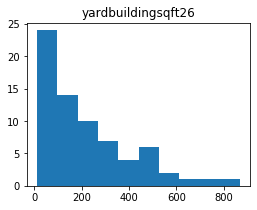

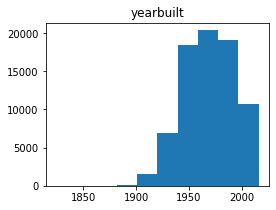

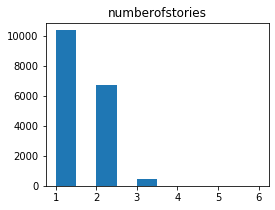

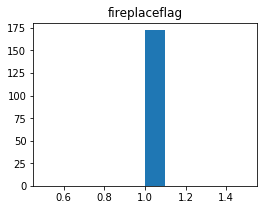

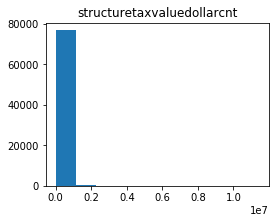

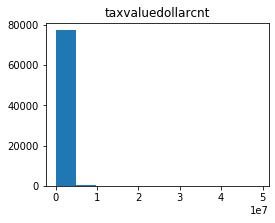

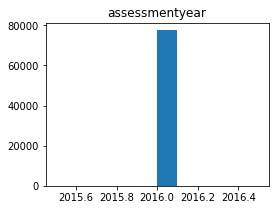

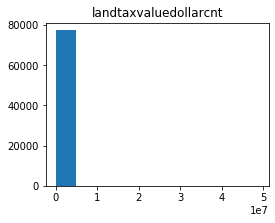

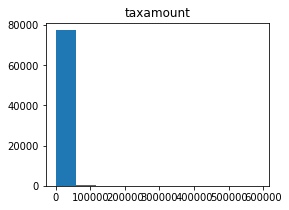

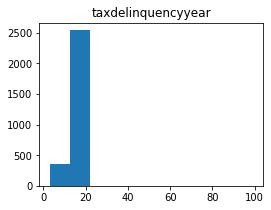

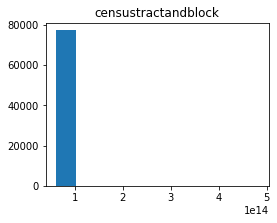

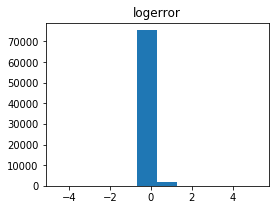

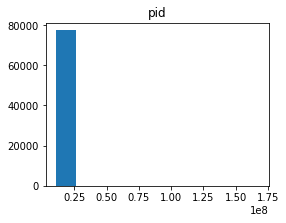

In [8]:
for col in df.columns:
    if df[col].dtype != object:
        plt.figure(figsize=(4,3))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [9]:
for col in df.columns:
    print("\n")
    print(df[col].value_counts())
    print("\n")



12086286    1
13842812    1
17089101    1
14604878    1
11149905    1
           ..
13926436    1
10832543    1
11078987    1
11089228    1
14298875    1
Name: parcelid, Length: 77380, dtype: int64




6.0     219
4.0       1
13.0      1
10.0      1
Name: typeconstructiontypeid, dtype: int64




7.0    50
Name: storytypeid, dtype: int64




261.0    52319
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64




2.0     33550
7.0     14064
24.0      846
6.0       776
20.0      104
13.0       59
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64




4.0    14
3.0     1
Name: buildingclasstypeid, dtype: int64




7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64




1.0     23133
13.0     1574
5.0       167
11.0       53

100000.0    82
200000.0    58
203050.0    55
90000.0     52
95000.0     49
            ..
252568.0     1
600234.0     1
329176.0     1
365649.0     1
896.0        1
Name: structuretaxvaluedollarcnt, Length: 50429, dtype: int64




400000.0    56
600000.0    50
350000.0    49
450000.0    45
420000.0    43
            ..
302925.0     1
499532.0     1
92688.0      1
151460.0     1
98304.0      1
Name: taxvaluedollarcnt, Length: 50948, dtype: int64




2016.0    77380
Name: assessmentyear, dtype: int64




21299.0     97
22755.0     68
304575.0    65
30210.0     63
203050.0    63
            ..
68034.0      1
868500.0     1
434249.0     1
92178.0      1
114688.0     1
Name: landtaxvaluedollarcnt, Length: 51600, dtype: int64




2418.22     8
3720.52     7
1725.20     5
2217.31     5
3815.22     5
           ..
3716.17     1
7358.73     1
4654.70     1
2642.95     1
10240.00    1
Name: taxamount, Length: 73824, dtype: int64




Y    2886
Name: taxdelinquencyflag, dtype: int64




15.0    15

## 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where 
- each row is an atttribute name
- the first column is the number of rows with missing values for that attribute
- the second column is percent of total rows that have missing values for that attribute. 
- Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
def null_finder_columns(df):
    '''
    This function takes in a DataFrame and list 
    information about the null values in the columns
    '''
    #accepts a 'df' and creates a new one labeled 'nulls'  
    #nulls index is the df's columns
    nulls = pd.DataFrame(index = df.columns)
    #sums up the null values in the dataframes columns
    nulls['num_rows_missing'] = df.isnull().sum(axis = 0)
    #finds the percentage of null values in the df's columns
    nulls['pct_rows_missing'] = nulls.num_rows_missing / df.shape[0]
    return nulls

In [11]:
null_columns = null_finder_columns(df)

In [12]:
null_columns.sort_values(by = 'pct_rows_missing', ascending = False).head(30)

,num_rows_missing,pct_rows_missing
buildingclassdesc,77365,0.999806
buildingclasstypeid,77365,0.999806
finishedsquarefeet13,77339,0.999470
storytypeid,77330,0.999354
storydesc,77330,0.999354
basementsqft,77330,0.999354
yardbuildingsqft26,77310,0.999095
fireplaceflag,77208,0.997777
architecturalstyletypeid,77174,0.997338
architecturalstyledesc,77174,0.997338




<div class="alert alert-block alert-info">
Takeaways: 
    
- There are 34 out of the 68 columns missing more than half the value
    
- May need to drop a lot of the data  
    
</div>

## 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: 
- the number of columns missing, 
- percent of columns missing, 
- number of rows with n columns missing. 
- Run the function and document takeaways from this on how you want to handle missing values.

In [13]:
def null_finder_rows(df):
    '''
    This function finds the number of columns missing in a row,
    the percent of columns missing in the row
    and the number of rows that have the same amount of columns missing
    '''
    #initiate a dataframe
    rows = pd.DataFrame()
    #find the number of columns missing in the row
    rows['num_cols_missing'] = df.isnull().sum(axis=1)
    #find the percentage of columns missing in the row
    rows['pct_cols_missing'] = df.isnull().sum(axis=1) / df.shape[1]
    #group by 'num_cols_missing' and find 
    #how many rows have that number of columns missing
    num_rows = rows.groupby('num_cols_missing').count()
    #rename the column as 'num_rows'
    num_rows = num_rows.rename(columns ={'pct_cols_missing': "num_rows"})
    #group by 'num_cols_missing' and find 
    #the percentage of columns missing in the row
    pct_cols = rows.groupby('num_cols_missing').mean()
    #combine the 'pct_cols' and 'num_rows'
    result = pd.concat([pct_cols, num_rows], axis=1, sort=False)
    #take the 'num_cols_missing' out of the index
    result = result.reset_index()
    return result

In [14]:
null_rows = null_finder_rows(df)

In [15]:
null_rows.sort_values(by = 'pct_cols_missing', ascending = False).head(10)

,num_cols_missing,pct_cols_missing,num_rows
25,48,0.695652,3
24,47,0.681159,3
23,46,0.666667,5
22,45,0.652174,50
21,44,0.637681,78
20,43,0.623188,28
19,42,0.608696,23
18,41,0.594203,29
17,40,0.579710,230
16,39,0.565217,285


<div class="alert alert-block alert-info">
Takeaways:

- Below 60% is a major jump in rows missing

- This will be the threshold 
    
</div>

# Prepare

## 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...).
- There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. 
- Add some new logic that will reduce the number of properties that are falsely removed. 
- You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [16]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52319
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64


<div class="alert alert-block alert-info">
Takeaways:

- keep only single family residential(261), residential general(260) 
    
</div>

In [17]:
df = df[df.propertylandusetypeid.isin([260,261])]

In [18]:
df.shape

(52356, 69)

- Check bedroom and bathroom counts

In [19]:
df.bedroomcnt.value_counts()

3.0     23304
4.0     15213
2.0      8317
5.0      3969
6.0       634
1.0       612
0.0       162
7.0       106
8.0        25
9.0         8
10.0        2
11.0        2
12.0        1
14.0        1
Name: bedroomcnt, dtype: int64

In [20]:
df.bathroomcnt.value_counts()

2.0     21840
3.0     10654
1.0      9537
2.5      3932
4.0      2226
3.5       916
1.5       839
5.0       804
4.5       686
6.0       321
5.5       224
0.0       146
7.0        89
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
13.0        1
18.0        1
Name: bathroomcnt, dtype: int64

<div class="alert alert-block alert-info">
Takeaways:

- 178 houses had either 0 as bedroom or bathroom
    
</div>

In [21]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]

In [22]:
df.shape

(52178, 69)

In [23]:
df.unitcnt.value_counts(dropna=False)

1.0    33698
NaN    18451
2.0       26
4.0        2
3.0        1
Name: unitcnt, dtype: int64


<div class="alert alert-block alert-info">
Takeaways:

- 18541 null unit counts. They are probably unit counts of 1.

- Filter out the units that are more than one
    
</div>

In [24]:
df.unitcnt = df.unitcnt.fillna(1.0)

In [25]:
df = df[df.unitcnt == 1]

In [26]:
(df.unitcnt != 1).sum()

0

In [27]:
df.shape

(52149, 69)

## 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [28]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    thresh_col = int(round(prop_required_column*df.shape[0],0))
    df.dropna(axis=1, thresh=thresh_col, inplace=True)
    thresh_row = int(round(prop_required_row*df.shape[1],0))
    df.dropna(axis=0, thresh=thresh_row, inplace=True)
    return df 

In [29]:
df = handle_missing_values(df, .6, .6)

## 3. Decide how to handle the remaining missing values:

   - Fill with constant value.
   - Impute with mean, median, mode.
   - Drop row/column

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52149 entries, 0 to 77379
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52149 non-null  int64  
 1   propertylandusetypeid         52149 non-null  float64
 2   heatingorsystemtypeid         33815 non-null  float64
 3   id                            52149 non-null  int64  
 4   bathroomcnt                   52149 non-null  float64
 5   bedroomcnt                    52149 non-null  float64
 6   buildingqualitytypeid         33612 non-null  float64
 7   calculatedbathnbr             52133 non-null  float64
 8   calculatedfinishedsquarefeet  52141 non-null  float64
 9   finishedsquarefeet12          51983 non-null  float64
 10  fips                          52149 non-null  float64
 11  fullbathcnt                   52133 non-null  float64
 12  latitude                      52149 non-null  float64
 13  l

<div class="alert alert-block alert-info">
Takeaways:

- dropping typeid that are no longer needed
    
</div>

In [31]:
df = df.drop(columns=["id", "propertylandusetypeid", "heatingorsystemtypeid"])

In [32]:
df.isnull().sum().sort_values(ascending = False)

buildingqualitytypeid           18537
propertyzoningdesc              18476
heatingorsystemdesc             18334
regionidcity                     1028
lotsizesquarefeet                 350
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         69
yearbuilt                          40
regionidzip                        23
calculatedbathnbr                  16
fullbathcnt                        16
calculatedfinishedsquarefeet        8
taxamount                           4
landtaxvaluedollarcnt               1
taxvaluedollarcnt                   1
longitude                           0
fips                                0
bedroomcnt                          0
bathroomcnt                         0
latitude                            0
propertylandusedesc                 0
propertycountylandusecode           0
rawcensustractandblock              0
regionidcounty                      0
roomcnt                             0
unitcnt     

<div class="alert alert-block alert-info">
Takeaways:

- propertyzoningdesc = Description of the allowed land uses (zoning) for that property
- dropping because we already filtered for single unit residential.
- let's take a closer look into the missing values
    
</div>

In [33]:
df = df.drop(columns=["propertyzoningdesc"])

In [34]:
df.heatingorsystemdesc.value_counts(dropna = False)

Central       20676
NaN           18334
Floor/Wall    12505
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

<div class="alert alert-block alert-info">
Takeaways:

- In southern California, the NaN values are most likely no type of heating system

- We will fill Nan with none
    
</div>

In [35]:
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna("None")

In [36]:
(df.calculatedbathnbr == df.bathroomcnt).sum() / len(df)

0.9996931868300447

<div class="alert alert-block alert-info">
Takeaways:

- Looks like calculatedbathrbr is equivalent to bathroomcnt
- drop the duplicate column
    
</div>

In [37]:
df = df.drop(columns=["calculatedbathnbr"])

<div class="alert alert-block alert-info">
Takeaways:

- We have dropped all we can
- To fill the rest of the NaNs we should split the data
    
</div>

## Train, Validate, and Test Splits

In [38]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, train_size=.8, random_state=123)
train, validate = train_test_split(train_and_validate, train_size = .7, random_state=123)

In [39]:
train.shape, validate.shape, test.shape

((29203, 30), (12516, 30), (10430, 30))

In [40]:
df.isnull().sum().sort_values(ascending = False).head(15)

buildingqualitytypeid           18537
regionidcity                     1028
lotsizesquarefeet                 350
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         69
yearbuilt                          40
regionidzip                        23
fullbathcnt                        16
calculatedfinishedsquarefeet        8
taxamount                           4
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
latitude                            0
propertylandusedesc                 0
dtype: int64

<div class="alert alert-block alert-info">
Takeaways:

- We will divide the remaining nulls into two columns
    - The fixed values will use the mode
    - the continuous values will use the median
    
</div>

In [41]:
cols_fixed = [
    'buildingqualitytypeid',
    'regionidcity',
    'censustractandblock',
    'regionidzip',
    'yearbuilt'
]


for col in cols_fixed:
    mode = int(train[col].mode())
    train[col].fillna(value = mode, inplace = True)
    validate[col].fillna(value = mode, inplace = True)
    test[col].fillna(value = mode, inplace = True)

In [42]:
train.isnull().sum().sort_values(ascending = False).head(15)

lotsizesquarefeet               199
finishedsquarefeet12             83
structuretaxvaluedollarcnt       36
fullbathcnt                      10
calculatedfinishedsquarefeet      4
taxamount                         3
propertylandusedesc               0
regionidcity                      0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid             0
fips                              0
latitude                          0
longitude                         0
propertycountylandusecode         0
dtype: int64

In [43]:
cols_cont = [
    'lotsizesquarefeet',
    'finishedsquarefeet12',
    'structuretaxvaluedollarcnt',
    'fullbathcnt',
    'calculatedfinishedsquarefeet',
    'taxamount',
    'landtaxvaluedollarcnt',
    'taxvaluedollarcnt'
]


for col in cols_cont:
    median = train[col].median()
    train[col].fillna(median, inplace=True)
    validate[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

In [44]:
train.isnull().sum().sort_values(ascending=False)

propertylandusedesc             0
heatingorsystemdesc             0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid                             0
tdate                           0
parcelid      

In [45]:
validate.isnull().sum().sort_values(ascending=False)

propertylandusedesc             0
heatingorsystemdesc             0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid                             0
tdate                           0
parcelid      

In [46]:
test.isnull().sum().sort_values(ascending=False)

propertylandusedesc             0
heatingorsystemdesc             0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid                             0
tdate                           0
parcelid      

- Since there are no more null values and the data is prepped, we can write the output to disk

In [ ]:
train.to_csv("zillow_train.csv")
validate.to_csv("zillow_validate.csv")
test.to_csv("zillow_test.csv")